In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
DATA = pd.read_csv('./MadaLine.csv')
X = np.asarray(DATA[DATA.columns[0:2]])
Y = np.asarray(DATA[DATA.columns[2]])

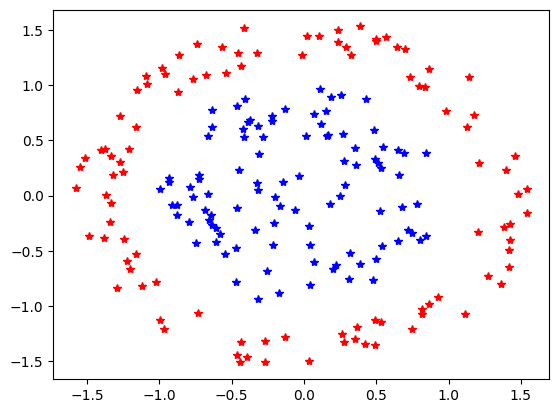

In [3]:
# Data of two classes
S = np.zeros((199, 2))
S[:100,:] = X[Y==1,:]
S[100:199,:] = X[Y==0,:]
T = np.zeros((199))
T[:100] = np.reshape(np.ones((100)) * (1), (100))
T[100:199] = np.reshape(np.ones((99)) * (-1), (99))
plt.plot(S[T==1, 0], S[T==1, 1], "*r")
plt.plot(S[T==-1, 0], S[T==-1, 1], "*b")

In [4]:
# AdaLine Network
def lpn(x, t, w, b, alpha):
    net = sum(x * w) + b
    if net >= 0:
        h = 1
    else:
        h = -1
    costf = 0.5 * ((t - net) ** 2)
    wnew = w + alpha * x * (t - net)
    bnew = b + alpha * (t - net)

    return [costf, net, h, wnew, bnew]

In [5]:
def MADALINE(s, t, neurons_num, w0, b0):
    
    plt.plot(s[t==1, 0], s[t==1, 1], "*r")
    plt.plot(s[t==-1, 0], s[t==-1, 1], "*b")    
    index = list(range(len(s)))
    random.shuffle(index)
    s = s[index, :]
    t = t[index]

    sample_num = len(s)
    max_epoch = 1000
    thr = 0.01
    alpha = 0.005
    input_num = 2

    w = w0
    b = b0

    y = np.zeros((sample_num))
    zin = np.zeros((neurons_num, 1))
    z = np.zeros((neurons_num, 1))
    epoch = 0
    for k in range(max_epoch):
        epoch += 1
        for j in range(sample_num):
            x = s[j, :]
            tj = t[j]
            for i in range(neurons_num):
                wi = w[i, :]
                bi = b[i]
                [costf1, net, h, wnew, bnew] = lpn(x, tj, wi, bi, alpha)
                zin[i] = net
                z[i] = h
            if all(z==-1):
                y[j]=-1
            else:
                y[j] = 1

            if tj != y[j]:
                if tj == 1:
                    zz = abs(zin)
                    index = np.where(zz == min(zz))[0]
                    w_old = w[index, :]
                    w[index, :] += alpha * x * (1 - zin[index])
                    b[index] += alpha * (1 - zin[index])
                    # diff = w[index, :] - w_old
                elif tj == -1:
                    index = np.where(zin > 0)[0]
                    # w_old = w[index, :]
                    for k2 in index:
                        w[k2, :] += alpha * x * (-1 - zin[k2])
                        b[k2] += alpha * (-1 - zin[k2])
                    # diff = w[index, :] - w_old
        if all(y == t):
            break

    print(epoch)

    # w1x1 +w2x2 +b1 =0
    for i in range(neurons_num):
        b0 = b[i]
        x2 = np.arange(-2, 2, 0.5)
        x1 = -(w[i, 1] * x2 + b[i]) / w[i, 0]
        plt.plot(x1, x2, 'k')
    plt.axis([-2, 2, -2, 2])
    plt.show()
    print("The accuracy of the model before normalized is: %.1f%%" % (sum((y==t))*100.0/y.shape[0]))

In [6]:
r = 0.1
input_num = 2
w0 = np.random.uniform(-r, r, [8, input_num])
b0 = np.random.uniform(-r, r, [8, 1])

19


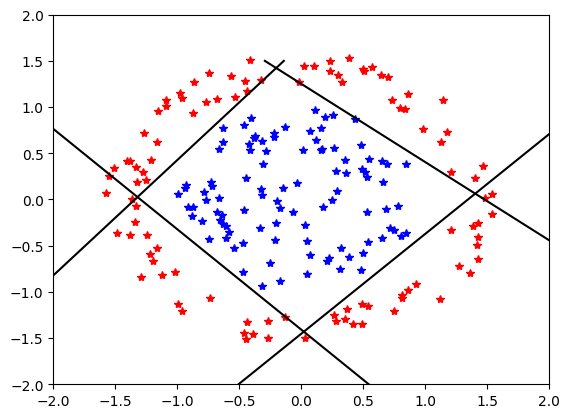

The accuracy of the model before normalized is: 100.0%


In [7]:
MADALINE(S, T, 4, w0[:4, :], b0[:4, :])

4


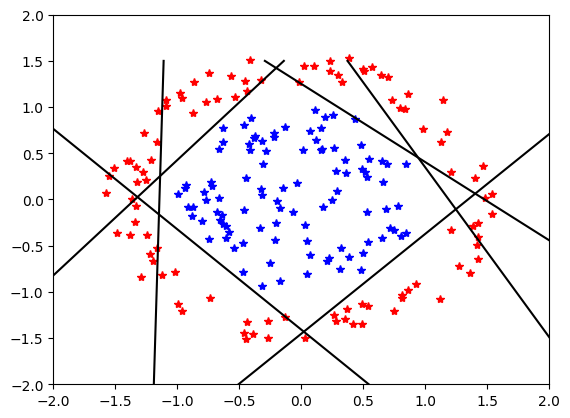

The accuracy of the model before normalized is: 100.0%


In [8]:
MADALINE(S, T, 6, w0[:6, :], b0[:6, :])

2


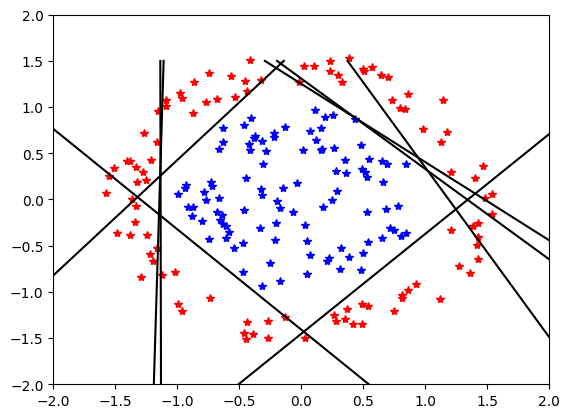

The accuracy of the model before normalized is: 100.0%


In [9]:
MADALINE(S, T, 8, w0[:8, :], b0[:8, :])